# Off To Reggression

This notebook will covered introduction of regression analysis and two most used model(s) linear regressions and logistic regression overview. 

**References**
 * [Linear Regression — Detailed Overview](https://towardsdatascience.com/linear-regression-cost-function-gradient-descent-normal-equations-1d2a6c878e2c)
 * [Machine Learning week 1: Cost Function, Gradient Descent and Univariate Linear Regression](https://medium.com/@lachlanmiller_52885/machine-learning-week-1-cost-function-gradient-descent-and-univariate-linear-regression-8f5fe69815fd)


***

**Brief on Regression Analysis**

Regression analysis is a form of predictive modeling technique which investigate the relationship between a dependent(target) and independent(prediction) variables(s).


**Benifits of using Regression Analysis**

* It indicates the significant relationship between dependent variables and independent variables.
* It indiactes the strength of impact of multiple independent variables on a dependent variable.

**Types of Regression**

There are various kinds of regression techniques available to make predictions. These techniques are mostly driven by three metrics.
 > 
  * number of variables
  * types of dependent variables
  * shape of regression line
  
Most commonly used regressions:
 * Linear Regression
 * Logistic Regression
 * Polynomial Regression
 
***

**Model Representation**

First goal of machine learning or data analysis is to construct a model : a hypothesis that can be used to estimate Y based on X. The hypothesis or model, maps input to output.

The hypothesis is usually presented as:
$$
    h(x) = \theta_0 + \theta_1 x  \label{eq:eq_hypothesis}
$$
Here,** *h(x)* ** represent the line mathematically.

***


## Linear Regression

In linear regression the hypothesis will be a linear equation and the hypothesis also resembles the line equation * y = mx + c*. 

Linear regression consists of finding the `best-fitting straight line` through the dataset. Lets take a sample dataset

```
X = [1, 1, 2, 3, 4, 3, 4, 6, 4]
Y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
```
and try to plot them in a scatter graph through python.

In [1]:
from numpy import array # to manage the array
from matplotlib import pyplot # to plot dataset

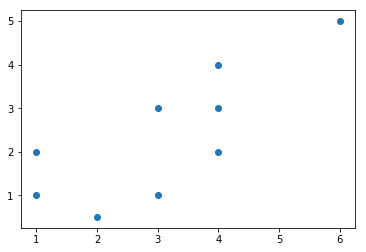

In [2]:
X = array([1, 1, 2, 3, 4, 3, 4, 6, 4])
Y = array([2, 1, 0.5, 1, 3, 3, 2, 5, 4]) 
pyplot.scatter(X, Y)

To find out a regression line through this dataset, a stright line has to constructed with these dataset. A line equation is 
> y = mx + c
 * x is independent variable(s)
 * y is dependent variable(s)
 * c is intercept value of the line
 * m is slope of the line
 

Here we the dataset
```
X = [1, 1, 2, 3, 4, 3, 4, 6, 4]
Y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
```
We have to predict value set of `Y'` for each of `X` by using `X` and `Y` values.

***

$$
m = \frac{\overline{X}\overline{Y} - \overline{XY}}{ \overline{X}\overline{X} - \overline{X^2} }
\\
c = \overline{Y} - m\overline{X}
$$

***

To find out these value a python program is given value

In [3]:
from statistics import mean

In [4]:
def slope(X, Y):
    m = (mean(X)*mean(Y) - mean(X*Y)) / (mean(X)*mean(X) - mean(X*X))
    return m

In [5]:
def intercept(X, Y, m):
    c = mean(Y) - (m * mean(X))
    return c

In [6]:
m = slope(X, Y)
c = intercept(X, Y, m)
Y_prime = [m*x + c for x in X]
print(Y_prime)

[1.0925925925925926, 1.0925925925925926, 1.7407407407407407, 2.388888888888889, 3.037037037037037, 2.388888888888889, 3.037037037037037, 4.333333333333334, 3.037037037037037]


In [7]:
# represent the actual and predicted values
float_formatter = "{:.2f}".format
print([float_formatter(y) for y in Y ])
print([float_formatter(y) for y in Y_prime ])

['2.00', '1.00', '0.50', '1.00', '3.00', '3.00', '2.00', '5.00', '4.00']
['1.09', '1.09', '1.74', '2.39', '3.04', '2.39', '3.04', '4.33', '3.04']


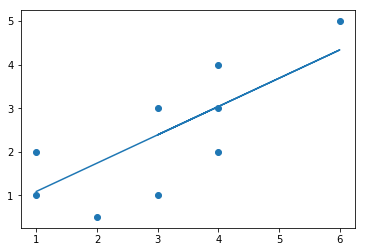

In [8]:
# ploting the regression line on scatter graph
pyplot.scatter(X, Y)
pyplot.plot(X, Y_prime)

This code-session showed how to find out a linear regression from a dataset and ploting them with python. But is there only one regression line can be generated or there any other optional line(s) can be generated, we didn't discussed. Actually we find out one of the better fitted regression line with those above equation. Any other possibilies are also available. But why this line is fitted for this dataset and how it's calculated we will discuess letter in another note. Now, we see how to find out the best fitted regression line using `sklearn` library 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# reformet the X dataset into 2D as sklearn library requirements
X = [[1], [1], [2], [3], [4], [3], [4], [6], [4]]
Y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
regression = LinearRegression()
regression.fit(X, Y)
Y_prime_2 = regression.predict(X)
Y_prime_2

array([0.86170213, 0.86170213, 1.58510638, 2.30851064, 3.03191489,
       2.30851064, 3.03191489, 4.4787234 , 3.03191489])

In [11]:
# represent the actual and predicted values
float_formatter = "{:.2f}".format
print([float_formatter(y) for y in Y ])
print([float_formatter(y) for y in Y_prime_2 ])

['2.00', '1.00', '0.50', '1.00', '3.00', '3.00', '2.00', '5.00', '4.00']
['0.86', '0.86', '1.59', '2.31', '3.03', '2.31', '3.03', '4.48', '3.03']


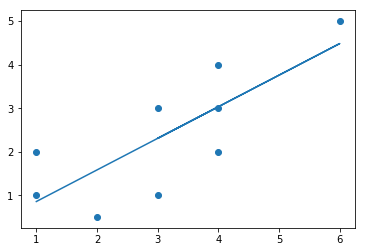

In [12]:
pyplot.scatter(X,Y)
pyplot.plot(X,Y_prime_2)

Now let compare the `sklearn` generated regression line and manually find out regression line on the scatter graph. `Y_prime` values are generated by ourselfs and `Y_prime_2` values are generated by `sklearn` model. `Green` line will be out predicted regression line and `Red` one is by `sklearn` library.

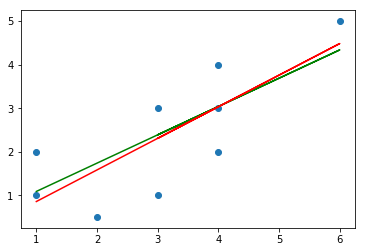

In [13]:
pyplot.scatter(X, Y)
pyplot.plot(X, Y_prime, color='green')
pyplot.plot(X, Y_prime_2, color='red')

***

## Logistic Regression

**References**
 * [Logistic Regression - GreyAtom](https://medium.com/greyatom/logistic-regression-89e496433063)

Every machine learning or data science algorithm works best under a given set of condition. Logistic Regression is a machine learning classification algorithm that is used to predict the probability of a categorical dependent variable that contains `1/0` or `True/False` or this kind of categories.

Linear Regression is `unbound` and this brings Logistic Regression into picture. Their value strictly ranges from 0 to 1. Logistics regression is generally used in Binary dependent variable.


**Types of Logistic Regression**
 * Binary Logistic Regression
 
   The categorical response has only two possible outcomes. E.g. : True or False
   
   
 * Multinomial Logistic Regression
 
   Three or more categories without ordering. E.g.: Rainy/Sunny/Mild
   
   
 * Ordinal Logistic Regression
 
   Three or more categories with ordering. Good/Normal/Bad
 



| Linear                      | Logistic                                       |
| --------------------------- | ---------------------------------------------- |
| Target is interval variable | Target is discrete(binary or ordinal) variable |
| Predictive values are the mean of the inputed variables| Predicted values are the probability of the inputed target variables |


***

**When Linear Regression Doesn't works?**

Lets take a categorical sample dataset 
```
    X = [0,1,2,3,4,5,5,6,6,7,8,9]
    Y = [0,0,0,0,0,0,1,1,1,1,1,1]
```
and try to find out a regression line over this dataset scatter using sklearn library

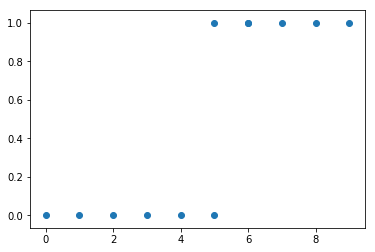

In [14]:
X = array([0,1,2,3,4,5,5,6,6,7,8,9])
Y = array([0,0,0,0,0,0,1,1,1,1,1,1])
X = X.reshape(len(X), -1) # reshape from [x1, x2] to [[x1], [x2]]
pyplot.scatter(X,Y)

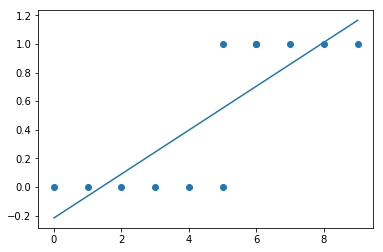

In [46]:
regression = LinearRegression()
regression.fit(X, Y)
Y_prime = regression.predict(X)
pyplot.scatter(X, Y)
pyplot.plot(X, Y_prime)

As we see, linear regression is not suitable for this categorical classification dataset. As because linear regression isn't desined to predict the probability of an event occuring. Linear Regression is useful in continuous dependent variable; but here the depedent variable is not continuous. For this logistic regression come to play to solve this problem.

In [16]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

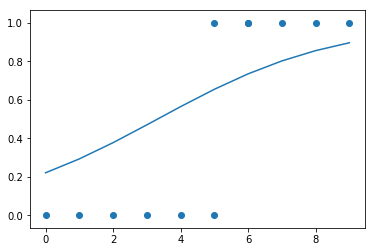

In [48]:
logit = LogisticRegression()
logit.fit(X, Y)
proba = logit.predict_proba(X)
pyplot.scatter(X, Y)
pyplot.plot(X, proba[:,1])

This is a sample dataset, so the line curve couldn't shaped well. But the overall concept is seem clear, that the logit function separate the samples into to class, one side of the curve is only 0 another side contains only 1(s).

**Logistic Regression Equation**

The underlying algorithm of Maximum Likelihood Estimation (MLE) determines the regression coefficient for the model that accurately predicts the probability of the binary dependent variable. Since the probability of any event lies between 0 and 1 or 0% to 100%, when we plot the probability of the dependent variable by independent factors, it will demonstrate an `S` shape curve.

Logit Transformation is defined as follows:

$$
    Logit = \log{\frac{p}{1-p}}
    \\[0.3in]
    Logit = \log{\frac{probability\:of\:event\:happening}{probability\:of\:event\:not\:happening}}
    \\[0.3in]
    Logit = \log{Odds}
$$

Logistic Regression is part of a larger class algorithm known as `Generalized Linear Model (GLM)`. The fundamental equation of GSM is

$$
    g(E(y)) = \alpha + \beta x1 + \gamma x2
$$


Here:
 * `g()` is the link function
 * `E(y)` is the expectation of target variable
 * rest is the linear predictor where `alpha`, `beta`, `gamma` to be predicted
 

From the linear regression hypothesis we can write

$$
    h(y) = \theta_0 + \theta_1(x)
    \\
    or
    \\
    g(y) = \beta_0 + \beta(x)
$$

Assume we are trying to predict a binary classification problem which outcome can be `True` or `False`. In logistic regression the above `g()` is link function and. So this function is establishing using two things `probability of success (p)` and `probability of failure (1-p)`. 

P should meet following criteria:
 * It must always to positive (since p<=1)
 * It must alway to less or equal to 1 (since p>=1)

To establishing the link function we denote `g()` with `p` initially. That means we are trying to find out the probability of success. We have to find out the value of `beta 0` and `beta` using `x`.

So,

$$
    p = g(y) = \beta_0 + \beta(x)
$$

Since the probability must always be positive we'll put the linear equation in exponentail form, so that negative values doesn't effect on the probability. Remember this is just a hypothesis, we are not calculating, we are deriving from linear regression hypothesis to logistic regression equation. 

$$
    p = \exp(\beta_0 + \beta(x)) = e^{(\beta_0 + \beta(x))}
$$

To make probability less than 1, devide `p` by a number greater that `p`. Simply devide by `p+1` or

$$
    p = \frac{\exp(\beta_0 + \beta(x))}{\exp(\beta_0 + \beta(x))+1} = \frac{e^{(\beta_0 + \beta(x))}}{e^{(\beta_0 + \beta(x))}+1}
$$

From this above three equation we can redefine the probability as:

$$
    p = \frac{e^y}{e^y+1}
$$
here `p` is the probability of success and eqation is the `logit` function. Ultimately we get

$$
    p = \frac{1}{1+e^{-y}}
    \\[0.3in]
    y = \log(\frac{p}{1-p})
    \\[0.3in]
    odds = \frac{p}{1-p}
$$

This `p` equation is a `sigmoid` function.